In [5]:
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import glob

### Data loading and preprocessing

In [6]:
data_path = "/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/"
merged_df = []
for file_name in glob.glob(data_path+'*.csv'):
    print(file_name)
    df = pd.read_csv(file_name)
    merged_df.append(df)
    # print(df.columns)
    # df = pd.concat([df, pd.read_csv(file_name)],axis=0, ignore_index=True, sort=False)
df_data = pd.concat(merged_df)

/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P31.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day2.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P30.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day1.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P29.csv


In [7]:
df_data.columns

Index(['user_id', 'name', 'age', 'location', 'used_hand', 'study_id',
       'study_day', 'try_allowed', 'try_number', 'try_remaining',
       'study_start', 'study_end', 'game_type', 'star_time', 'end_time',
       'total_time', 'data'],
      dtype='object')

In [8]:
from datetime import date
from datetime import datetime
'''
Calculate time difference in seconds between two time
Input: t1, t2
Return: time difference in seconds
'''
def time_diff(t1, t2):
    a = datetime.strptime(t1, '%Y-%m-%d %H:%M:%S.%f')
    b = datetime.strptime(t2, '%Y-%m-%d %H:%M:%S.%f')
    return (b - a).total_seconds() * 1000

'''
Calculate age in the year fromate from DoB (if DoB present in the age column)
Input: born (in %Y-%m-%d format)
Return: Age (in Year)
'''
def calculate_age(born):
    if(not isinstance(born, str)):
        return int(born)
    born = datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

#### Data pre-processing

In [9]:
import re
start_re=re.compile(r'{')
end_re = re.compile(r'}')
error_re = re.compile('')

df_all_participants_data = pd.DataFrame(columns =  ["object_name", "drop_box", "move_path", "is_error", "start_time", "end_time", "time_diff", "total_point", "age", "name"])
trail = [-1, 2, 1, -1, -1, -1]
## Filter data only for At The Market Game
df_data = df_data[df_data['game_type'] == "at_the_market"]
df_data = df_data.reset_index()
# df_data = df_data.iloc[trail[i]]
# print(data.shape)
list_dict = []
for index, participants in df_data.iterrows():
    # print(participants)
    d = participants["data"]
    # print(d)
    # print("Participant", participants["name"])
    d = d.replace("'\\", "''")
    list_dict = []
    while(len(d)>10):
        try:
            mo1 = start_re.search(d)
            start = mo1.group(0)
            mo2 = end_re.search(d)
            end = mo2.group(0)
            seg = "{" + d[d.find(start) + len(start):d.find(end)] + "}"
            d = d[d.find(end) + 1:]
            seg_dict = eval(seg)
            # print(seg_dict)
            list_dict.append(seg_dict)
        except Exception as e:
            print("type error: " + str(e))
            new_seg = seg
            # mo1 = start_re.finditer(seg)
            index = [(i.start(),i.end()) for i in start_re.finditer(seg)][-1]
            # print(mo1)
            # start = mo1.group(1)
            seg = new_seg[index[0]:]
            list_dict.append(eval(seg))
            # print(d)
    # print(len(list_dict))
    df_at_the_market = pd.DataFrame(list_dict[:-1])
    base_point = list_dict[-1]
    df_at_the_market = df_at_the_market[["object_name", "drop_box", "move_path", "is_error", "start_time", "end_time", "hand"]]
    df_at_the_market = df_at_the_market.dropna(axis=0, how='any')
    df_at_the_market["time_diff"] = df_at_the_market.apply(lambda x: time_diff(x.start_time, x.end_time), axis=1)
    df_at_the_market["total_point"] = df_at_the_market.apply(lambda x: len(x.move_path), axis=1)
    # df_time = df_at_the_market[["object_name", "time_diff"]].groupby("object_name").sum()
    # df_time = df_time.reset_index()
    # df_time = df_time.mask(df_time.eq('None')).dropna()
    ### Add age column
    age = calculate_age(participants["age"])
    # print(age, type(age))
    df_at_the_market["age"] = [age] * df_at_the_market.shape[0]
    df_at_the_market["name"] = [participants["name"]] * df_at_the_market.shape[0]
    # print(df_at_the_market)
    frames = [df_all_participants_data, df_at_the_market]
    df_all_participants_data = pd.concat(frames)
df_all_participants_data['object_cat'] = pd.factorize(df_all_participants_data.object_name)[0]
base_point = list_dict[-1]
print(base_point)
df_all_participants_data


type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/1876059002.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all_participants_data = pd.concat(frames)


type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
type error: unexpected EOF while parsing (<string>, line 1)
{'fruit8': '(158,558)', 'fruit2': '(48,234)', 'box4': '(847,263)', 'box8': '(847,500)', 'fruit7': '(86,466)', 'fruit1': '(118,128)', 'box7': '(720,500)', 'fruit6': '(214,429)', 'box3': '(720,263)', 'fruit5': '(76,354)', 'box6': '(847,381)', 'box2': '(847,146)', 'fruit4': '(173,329)', 'box5': '(720,381)', 'box1': '(720,146)', 'fruit3': '(193,222)'}


,object_name,drop_box,move_path,is_error,start_time,end_time,time_diff,total_point,age,name,hand,object_cat
0,fruit3,box1,"[(238.0, 260.5), (240.0, 260.5), (241.5, 259.5...",1.0,2023-06-19 14:05:08.653,2023-06-19 14:05:10.649,1996.0,99,8,P31,Right,0
1,None,outside,[],1.0,2023-06-19 14:05:11.219,2023-06-19 14:05:11.865,646.0,0,8,P31,Right,1
2,fruit3,box2,"[(754.5, 201.0), (760.5, 201.0), (763.0, 201.5...",0.0,2023-06-19 14:05:12.135,2023-06-19 14:05:14.382,2247.0,79,8,P31,Right,0
3,fruit3,box2,[],0.0,2023-06-19 14:05:15.134,2023-06-19 14:05:15.248,114.0,0,8,P31,Right,0
4,fruit3,box2,"[(914.0, 192.5), (915.0, 194.0), (916.0, 195.0)]",0.0,2023-06-19 14:05:15.684,2023-06-19 14:05:15.781,97.0,3,8,P31,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33,fruit6,box5,"[(834.5, 397.5), (829.0, 401.5), (824.0, 404.5...",1.0,2023-06-19 14:38:46.236,2023-06-19 14:38:47.217,981.0,24,5,P29,Left,2
34,None,outside,"[(110.5, 399.0), (110.5, 402.5), (110.5, 404.0...",1.0,2023-06-19 14:38:48.667,2023-06-19 14:38:48.834,167.0,38,5,P29,Left,1
36,fruit4,box2,"[(222.0, 372.5), (222.0, 374.5), (222.0, 376.5...",0.0,2023-06-19 14:38:53.335,2023-06-19 14:38:57.097,3762.0,182,5,P29,Left,3
37,fruit3,box4,"[(232.5, 260.0), (232.5, 262.5), (232.5, 264.5...",1.0,2023-06-19 14:38:57.850,2023-06-19 14:39:01.389,3539.0,171,5,P29,Left,0


In [15]:
df_all_participants_data = df_all_participants_data[df_all_participants_data.object_cat != 8]
df_all_participants_data = df_all_participants_data[df_all_participants_data['object_name'].notna()]
df_all_participants_data = df_all_participants_data[df_all_participants_data["move_path"].str.len() > 10]
df_all_participants_data

,object_name,drop_box,move_path,is_error,start_time,end_time,time_diff,total_point,age,name,hand,object_cat
0,fruit3,box1,"[(238.0, 260.5), (240.0, 260.5), (241.5, 259.5...",1.0,2023-06-19 14:05:08.653,2023-06-19 14:05:10.649,1996.0,99,8,P31,Right,0
2,fruit3,box2,"[(754.5, 201.0), (760.5, 201.0), (763.0, 201.5...",0.0,2023-06-19 14:05:12.135,2023-06-19 14:05:14.382,2247.0,79,8,P31,Right,0
5,fruit6,box1,"[(260.5, 463.0), (273.0, 461.5), (281.5, 459.5...",1.0,2023-06-19 14:05:17.416,2023-06-19 14:05:19.997,2581.0,117,8,P31,Right,2
9,fruit6,box3,"[(793.0, 193.5), (794.5, 200.0), (796.5, 204.0...",0.0,2023-06-19 14:05:22.548,2023-06-19 14:05:23.765,1217.0,55,8,P31,Right,2
10,fruit6,box1,"[(781.5, 305.5), (781.5, 302.5), (781.5, 297.5...",1.0,2023-06-19 14:05:24.331,2023-06-19 14:05:25.062,731.0,29,8,P31,Right,2
...,...,...,...,...,...,...,...,...,...,...,...,...
33,fruit6,box5,"[(834.5, 397.5), (829.0, 401.5), (824.0, 404.5...",1.0,2023-06-19 14:38:46.236,2023-06-19 14:38:47.217,981.0,24,5,P29,Left,2
34,None,outside,"[(110.5, 399.0), (110.5, 402.5), (110.5, 404.0...",1.0,2023-06-19 14:38:48.667,2023-06-19 14:38:48.834,167.0,38,5,P29,Left,1
36,fruit4,box2,"[(222.0, 372.5), (222.0, 374.5), (222.0, 376.5...",0.0,2023-06-19 14:38:53.335,2023-06-19 14:38:57.097,3762.0,182,5,P29,Left,3
37,fruit3,box4,"[(232.5, 260.0), (232.5, 262.5), (232.5, 264.5...",1.0,2023-06-19 14:38:57.850,2023-06-19 14:39:01.389,3539.0,171,5,P29,Left,0


In [16]:
# df_all_participants_data["name"] =  df_all_participants_data["name"].str.split(',')
df_all_participants_data["move_path"]

0     [(238.0, 260.5), (240.0, 260.5), (241.5, 259.5...
2     [(754.5, 201.0), (760.5, 201.0), (763.0, 201.5...
5     [(260.5, 463.0), (273.0, 461.5), (281.5, 459.5...
9     [(793.0, 193.5), (794.5, 200.0), (796.5, 204.0...
10    [(781.5, 305.5), (781.5, 302.5), (781.5, 297.5...
                            ...                        
33    [(834.5, 397.5), (829.0, 401.5), (824.0, 404.5...
34    [(110.5, 399.0), (110.5, 402.5), (110.5, 404.0...
36    [(222.0, 372.5), (222.0, 374.5), (222.0, 376.5...
37    [(232.5, 260.0), (232.5, 262.5), (232.5, 264.5...
38    [(97.0, 286.0), (102.0, 291.0), (108.0, 297.0)...
Name: move_path, Length: 251, dtype: object

In [21]:
### Drop unnecessary trajectory where the object didn't select for the movement
df_all_participants_data = df_all_participants_data[df_all_participants_data.object_name != 'None']
df_all_participants_data

,object_name,drop_box,move_path,is_error,start_time,end_time,time_diff,total_point,age,name,hand,object_cat
0,fruit3,box1,"[(238.0, 260.5), (240.0, 260.5), (241.5, 259.5...",1.0,2023-06-19 14:05:08.653,2023-06-19 14:05:10.649,1996.0,99,8,P31,Right,0
2,fruit3,box2,"[(754.5, 201.0), (760.5, 201.0), (763.0, 201.5...",0.0,2023-06-19 14:05:12.135,2023-06-19 14:05:14.382,2247.0,79,8,P31,Right,0
5,fruit6,box1,"[(260.5, 463.0), (273.0, 461.5), (281.5, 459.5...",1.0,2023-06-19 14:05:17.416,2023-06-19 14:05:19.997,2581.0,117,8,P31,Right,2
9,fruit6,box3,"[(793.0, 193.5), (794.5, 200.0), (796.5, 204.0...",0.0,2023-06-19 14:05:22.548,2023-06-19 14:05:23.765,1217.0,55,8,P31,Right,2
10,fruit6,box1,"[(781.5, 305.5), (781.5, 302.5), (781.5, 297.5...",1.0,2023-06-19 14:05:24.331,2023-06-19 14:05:25.062,731.0,29,8,P31,Right,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32,fruit6,box3,"[(785.5, 421.5), (787.0, 420.5), (788.5, 419.0...",1.0,2023-06-19 14:38:44.653,2023-06-19 14:38:45.219,566.0,22,5,P29,Left,2
33,fruit6,box5,"[(834.5, 397.5), (829.0, 401.5), (824.0, 404.5...",1.0,2023-06-19 14:38:46.236,2023-06-19 14:38:47.217,981.0,24,5,P29,Left,2
36,fruit4,box2,"[(222.0, 372.5), (222.0, 374.5), (222.0, 376.5...",0.0,2023-06-19 14:38:53.335,2023-06-19 14:38:57.097,3762.0,182,5,P29,Left,3
37,fruit3,box4,"[(232.5, 260.0), (232.5, 262.5), (232.5, 264.5...",1.0,2023-06-19 14:38:57.850,2023-06-19 14:39:01.389,3539.0,171,5,P29,Left,0


In [44]:
df_all_participants_data.columns

Index(['object_name', 'drop_box', 'move_path', 'is_error', 'start_time',
       'end_time', 'time_diff', 'total_point', 'age', 'name', 'hand',
       'object_cat', 'p1', 'p2', 'm', 'c', 'perp_dist', 'rmse',
       'time_diff_ss'],
      dtype='object')

### Utility functions

In [22]:
from numpy import ones,vstack
from numpy.linalg import lstsq
import ast
'''
Get straight-line equation from two points (P1, P2)
Return m, c for y=mx+c equation 
'''
def get_equation(p1, p2):
    points = [p1,p2]
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
    print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
    return m, c
'''
Get the Starting and Ending points of a trajectory
The trajectory may end outside of the cart, So it combines all trajectories to generate a single path for a movement (Fruit to Box)
Return: Start Point and End Point
'''
def get_points(fruit, box, name, hand, move_path):
    p_fruit = base_point[fruit]
    if(box == "outside"):
        print(fruit, box, name, hand)
        df_fruit = df_all_participants_data.where((df_all_participants_data["object_name"] == fruit)
                                                  & (df_all_participants_data["name"] == name) & 
                                                  (df_all_participants_data["hand"] == hand))
        # print(df_fruit)
        l = df_fruit["drop_box"].unique()
        # print(l)
        box = l[-1]
        # return ast.literal_eval(p_fruit), None
    if(box != "outside"):
        p_box = base_point[box]
    #     print(ast.literal_eval(p_fruit), ast.literal_eval(p_box))
        return ast.literal_eval(p_fruit), ast.literal_eval(p_box)
    print(move_path)
    return ast.literal_eval(p_fruit), move_path[-1]

In [23]:
df_all_participants_data[["p1", "p2"]] = df_all_participants_data.apply(lambda x: get_points(x["object_name"], x["drop_box"], x["name"], x["hand"], x["move_path"]), axis=1, result_type="expand")

fruit8 outside P15 Right
fruit6 outside P15 Right
fruit8 outside P15 Right
fruit4 outside P19 Right
fruit6 outside P19 Right
fruit8 outside P19 Left
fruit6 outside P7 Right
fruit6 outside P7 Right
fruit6 outside P7 Right
fruit3 outside P29 Right
fruit3 outside P29 Right
fruit6 outside P29 Left


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2831772467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_participants_data[["p1", "p2"]] = df_all_participants_data.apply(lambda x: get_points(x["object_name"], x["drop_box"], x["name"], x["hand"], x["move_path"]), axis=1, result_type="expand")
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2831772467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_participants_data[["p1", "p2"]] = df_all_participants_

In [24]:
df_all_participants_data[["m", "c"]] = df_all_participants_data.apply(lambda x: get_equation(x.p1, x.p2), axis=1, result_type="expand")

Line Solution is y = -0.14421252371916524x + 249.83301707779898
Line Solution is y = -0.11620795107033657x + 244.42813455657506
Line Solution is y = -0.5592885375494071x + 548.6877470355734
Line Solution is y = -0.3280632411067194x + 499.2055335968382
Line Solution is y = -0.5592885375494071x + 548.6877470355734
Line Solution is y = -0.3280632411067194x + 499.2055335968382
Line Solution is y = -0.5592885375494071x + 548.6877470355734
Line Solution is y = -0.26224328593996854x + 485.12006319115324
Line Solution is y = 0.09506398537477155x + 312.55393053016456
Line Solution is y = 0.07715133531157291x + 315.6528189910978
Line Solution is y = -0.0841799709724241x + 571.300435413643
Line Solution is y = 0.029900332225913675x + 124.47176079734223
Line Solution is y = 0.04315476190476179x + 231.92857142857144
Line Solution is y = 0.04192546583850936x + 350.81366459627344
Line Solution is y = 0.029900332225913675x + 124.47176079734223
Line Solution is y = -0.14421252371916524x + 249.833017077

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2955111051.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/94034660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_participants_data[["m", "c"]] = df_all_participants_data.apply(lambda x: get_equation(x.p1, x.p2), axis=1, result_type="expand")
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/94034660.py:1: SettingWithCopyWar

In [25]:
import math
'''
Calculate the perpendicular distance of each point of the path from the straight line (Ideal)
Return: Perpendicular distance in Pixle
'''
def cal_perpendicular_dist(points, m, c):
    # y = mx +c -> ax+by+c = 0
    a = m
    b = -1
    c = c
    perp_dist = []
    for p in points:
        x = p[0]
        y = p[1]
        dist = abs(a*x + b*y +c)/ math.sqrt(abs(a*a) + abs(b*b))
#         print(x, y, a, b, c, dist)
        perp_dist.append(dist)
    return perp_dist
'''
Calculate RMSE from Perpendicular distance
'''
def RMSE(perp_dist):
    se = sum(i*i for i in perp_dist)
    rmse = math.sqrt(se)/len(perp_dist)
    return rmse

In [26]:
df_all_participants_data["perp_dist"] = df_all_participants_data.apply(lambda x: cal_perpendicular_dist(x.move_path, x.m, x.c), axis=1)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/3411411223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_participants_data["perp_dist"] = df_all_participants_data.apply(lambda x: cal_perpendicular_dist(x.move_path, x.m, x.c), axis=1)


In [27]:
df_all_participants_data["rmse"] = df_all_participants_data.apply(lambda x: RMSE(x.perp_dist), axis=1)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/440458194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_participants_data["rmse"] = df_all_participants_data.apply(lambda x: RMSE(x.perp_dist), axis=1)


In [28]:
df_all_participants_data["time_diff_ss"] = df_all_participants_data["time_diff"].apply(lambda x: x/1000.0)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2795522467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_participants_data["time_diff_ss"] = df_all_participants_data["time_diff"].apply(lambda x: x/1000.0)


In [29]:
# Data export for manual checking
#df_all_participants_data[["name", "age", "hand", "object_name", "drop_box", "p1", "p2", "is_error", "rmse", "time_diff_ss"]].to_csv(data_path + "/at_the_market_error.csv", sep=',', encoding='utf-8', index=False)


In [30]:
df_all_participants_data.groupby(['name', 'age', 'hand', "object_name"]).agg(
    {
         'time_diff_ss':sum,    # Sum duration per group
         'is_error': sum,  # get the count of networks
         'rmse': sum  # get the first date per group
    }
)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2366547593.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_all_participants_data.groupby(['name', 'age', 'hand', "object_name"]).agg(
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2366547593.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_all_participants_data.groupby(['name', 'age', 'hand', "object_name"]).agg(


time_diff_ss  is_error        rmse
name age hand  object_name                                    
P13  3   Left  fruit3              7.300       1.0    6.367969
               fruit4              6.026       0.0    9.480004
               fruit5              4.867       1.0   15.560488
               fruit8              6.245       1.0    2.688756
         Right fruit3              4.408       1.0    5.450400
...                                  ...       ...         ...
P7   9   Right fruit3              1.774       0.0    2.349891
               fruit4              1.665       0.0    3.026004
               fruit5              3.516       0.0    5.785249
               fruit6             14.575      13.0  107.356372
               fruit8              5.387       1.0   19.963405

[107 rows x 3 columns]

#### Error Analysis
Calculate the following parameters:
1. object_name
2. time_diff_ss
3. movement_count
4. rmse
5. error_count
6. object_count
7. success_count
8. error_rate

In [31]:
error_analysis_1 = df_all_participants_data.groupby(['name', 'age', 'hand']).agg(
    {
        'object_name': np.unique,
        'time_diff_ss':sum,    # Sum duration per group
        'is_error': 'count',
         # 'is_error': sum,  # get the count of networks
         'rmse': sum  # get the first date per group
        
    }
)
error_analysis_1.columns = ["object_name", "time_diff_ss", "movement_count", "rmse"]

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/760676855.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  error_analysis_1 = df_all_participants_data.groupby(['name', 'age', 'hand']).agg(


In [32]:
error_analysis_2 = df_all_participants_data.groupby(['name', 'age', 'hand']).agg(
    {
         'is_error': sum,  # get the count of error
        
    }
)
error_analysis_2.columns = ["error_count"]

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/2799661991.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  error_analysis_2 = df_all_participants_data.groupby(['name', 'age', 'hand']).agg(


In [33]:
error_analysis = error_analysis_1.join(error_analysis_2, how='outer')


In [34]:
error_analysis = error_analysis.reset_index()

In [35]:
error_analysis["object_count"] = error_analysis.apply(lambda x: len(x["object_name"]), axis=1)
error_analysis["success_count"] = error_analysis.apply(lambda x: (x["movement_count"] - x["error_count"]), axis=1)
error_analysis["error_rate"] = error_analysis.apply(lambda x: (x["error_count"]/x["movement_count"]), axis=1)
error_analysis

,name,age,hand,object_name,time_diff_ss,movement_count,rmse,error_count,object_count,success_count,error_rate
0,P13,3,Left,"[fruit3, fruit4, fruit5, fruit8]",24.438,5,34.097217,3.0,4,2.0,0.600000
1,P13,3,Right,"[fruit3, fruit4, fruit5, fruit6, fruit8]",17.064,5,38.350371,5.0,5,0.0,1.000000
2,P15,10,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",12.580,9,55.493800,2.0,7,7.0,0.222222
3,P15,10,Right,"[fruit1, fruit3, fruit4, fruit5, fruit6, fruit8]",22.692,15,96.354962,9.0,6,6.0,0.600000
4,P19,9,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",15.587,13,89.372945,7.0,7,6.0,0.538462
5,P19,9,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",23.619,12,79.824939,5.0,7,7.0,0.416667
6,P25,8,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",23.541,12,94.540231,4.0,7,8.0,0.333333
7,P25,8,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",15.068,12,79.219135,5.0,7,7.0,0.416667
8,P28,14,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",30.818,27,252.825164,20.0,7,7.0,0.740741
9,P28,14,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",13.305,12,85.138763,4.0,7,8.0,0.333333


In [36]:
error_analysis = error_analysis.sort_values('age')

In [37]:
error_analysis = error_analysis[(error_analysis['age'] < 14.0) & (error_analysis['age'] >=4.0)]
error_analysis

,name,age,hand,object_name,time_diff_ss,movement_count,rmse,error_count,object_count,success_count,error_rate
10,P29,5,Left,"[fruit2, fruit3, fruit4, fruit6, fruit8]",19.673,7,91.854837,4.0,5,3.0,0.571429
11,P29,5,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",38.669,13,78.752961,6.0,7,7.0,0.461538
15,P31,8,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",55.608,30,244.377227,14.0,7,16.0,0.466667
14,P31,8,Left,"[fruit3, fruit6, fruit8]",22.340,8,52.389093,4.0,3,4.0,0.500000
6,P25,8,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",23.541,12,94.540231,4.0,7,8.0,0.333333
7,P25,8,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",15.068,12,79.219135,5.0,7,7.0,0.416667
4,P19,9,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",15.587,13,89.372945,7.0,7,6.0,0.538462
5,P19,9,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",23.619,12,79.824939,5.0,7,7.0,0.416667
16,P7,9,Right,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",31.315,21,146.052818,14.0,7,7.0,0.666667
2,P15,10,Left,"[fruit1, fruit2, fruit3, fruit4, fruit5, fruit...",12.580,9,55.493800,2.0,7,7.0,0.222222


#### Plot Age-wise completion time, error rate and RMSE

In [89]:
x_left = error_analysis[error_analysis['hand']=='Left']['age'].tolist()
x_right = error_analysis[error_analysis['hand']=='Right']['age'].tolist()
y_er_left = error_analysis[error_analysis['hand']=='Left']['error_rate'].tolist()
y_er_right = error_analysis[error_analysis['hand']=='Right']['error_rate'].tolist()
y_rmse_left = error_analysis[error_analysis['hand']=='Left']['rmse'].tolist()
y_rmse_right = error_analysis[error_analysis['hand']=='Right']['rmse'].tolist()
y_time_left = error_analysis[error_analysis['hand']=='Left']['time_diff_ss'].tolist()
y_time_right = error_analysis[error_analysis['hand']=='Right']['time_diff_ss'].tolist()
x_left, x_right, y_er_left, y_er_right

([5, 8, 8, 9, 10, 12],
 [5, 8, 8, 9, 9, 10, 12],
 [0.5555555555555556, 0.3076923076923077, 0.5, 0.5, 0.2, 0.1111111111111111],
 [0.4666666666666667,
  0.5294117647058824,
  0.4375,
  0.6521739130434783,
  0.38461538461538464,
  0.5882352941176471,
  0.0])

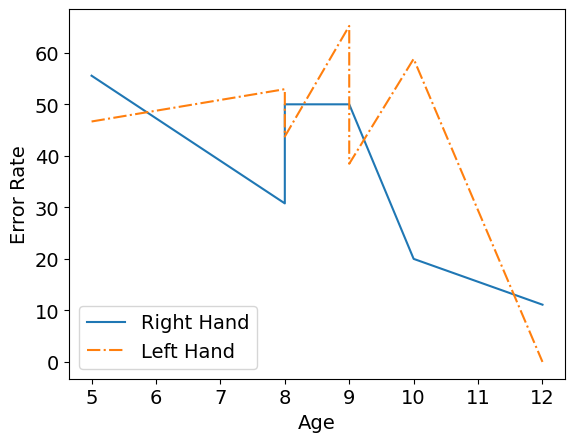

In [90]:
y_er_left = [x * 100 for x in y_er_left]
y_er_right = [x * 100 for x in y_er_right]
plt.plot(x_left, y_er_left, label ='Right Hand')
plt.plot(x_right, y_er_right, '-.', label ='Left Hand')

plt.xlabel("Age")
plt.ylabel("Error Rate")
plt.legend()
# plt.title('multiple plots')
plt.show()

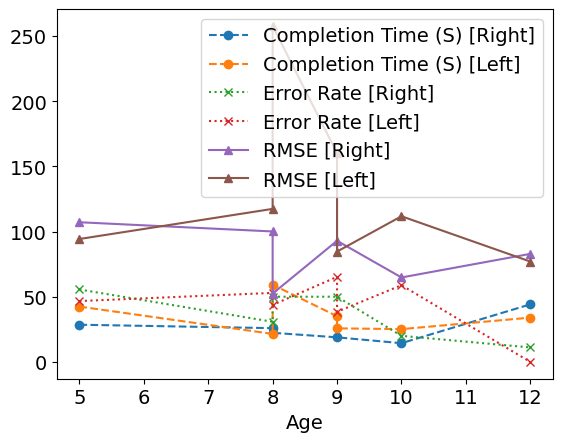

In [91]:
plt.plot(x_left, y_time_left, 'o--', label ='Completion Time (S) [Right]')
plt.plot(x_right, y_time_right, 'o--', label ='Completion Time (S) [Left]')
plt.plot(x_left, y_er_left, 'x:', label ='Error Rate [Right]')
plt.plot(x_right, y_er_right,'x:', label ='Error Rate [Left]')
plt.plot(x_left, y_rmse_left, '^-', label ='RMSE [Right]')
plt.plot(x_right, y_rmse_right, '^-', label ='RMSE [Left]')
plt.xlabel("Age")
# plt.ylabel("RMSE")
plt.legend()
# plt.title('multiple plots')
plt.show()

#### Plot the Ideal path and the movement trajectory of a trial

In [92]:
def get_intersection_points(move_path, perp_dist, p1, p2):
    # d=(x-x1)(y2-y1) - (y-y1)(x2-x1)
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    intersection_points = []
    for i in range (0, len(move_path)):
        d = ((move_path[i][0]-x1) * (y2-y1)) - ((move_path[i][1]-y1) * (x2-x1)) 
        print(move_path[i][0], move_path[i][1], d)
        if d<0 :
            intersection_points.append((move_path[i][0] , move_path[i][1]-perp_dist[i]))
        
        elif d>0:
            intersection_points.append((move_path[i][0] , move_path[i][1]+perp_dist[i]))
        
        else:
            intersection_points.append((move_path[i][0] , move_path[i][1]))
        
    
    return intersection_points
    

In [93]:
df_all_participants_data["intersec_point"] = df_all_participants_data.apply(lambda x: get_intersection_points(x.move_path, x.perp_dist, x.p1, x.p2), axis=1)

154.5 160.5 -18908.0
159.0 162.0 -19730.0
164.0 163.0 -20242.0
166.5 163.5 -20498.0
169.5 164.0 -20745.0
175.0 164.0 -20646.0
181.0 164.0 -20538.0
187.0 163.0 -19828.0
192.0 161.0 -18534.0
196.5 160.5 -18152.0
202.5 159.5 -17442.0
209.5 158.5 -16714.0
216.5 158.5 -16588.0
224.0 158.5 -16453.0
231.5 158.5 -16318.0
238.5 158.5 -16192.0
245.0 158.5 -16075.0
250.5 158.5 -15976.0
254.5 158.5 -15904.0
257.0 158.5 -15859.0
259.0 158.5 -15823.0
259.5 158.5 -15814.0
259.5 158.0 -15513.0
261.5 157.5 -15176.0
264.5 157.5 -15122.0
270.0 157.0 -14722.0
278.0 157.0 -14578.0
288.5 157.0 -14389.0
300.0 157.0 -14182.0
312.5 157.0 -13957.0
325.0 157.0 -13732.0
338.0 157.5 -13799.0
351.0 158.5 -14167.0
363.0 160.5 -15155.0
376.5 162.0 -15815.0
388.5 164.0 -16803.0
399.5 166.0 -17809.0
410.5 168.0 -18815.0
422.5 170.0 -19803.0
435.0 171.0 -20180.0
447.0 172.0 -20566.0
459.5 173.0 -20943.0
470.0 174.5 -21657.0
482.0 175.5 -22043.0
493.0 176.5 -22447.0
503.0 177.5 -22869.0
513.5 178.5 -23282.0
523.5 180.0 -

In [94]:
# df_molly = df_all_participants_data[(df_all_participants_data['name'] == "Molly Millard") & (df_all_participants_data['hand'] == "Right")]
df_molly = df_all_participants_data.iloc[:8]
df_molly

,object_name,drop_box,move_path,is_error,start_time,end_time,time_diff,total_point,age,name,hand,object_cat,p1,p2,m,c,perp_dist,rmse,time_diff_ss,intersec_point
0,fruit1,box1,"[(154.5, 160.5), (159.0, 162.0), (164.0, 163.0...",0,2023-06-20 15:12:04.259,2023-06-20 15:12:07.488,3229.0,145,12,Molly Millard,Right,0,"(118, 128)","(720, 146)",0.029900,124.471761,"[31.39460715079364, 32.759445688870244, 33.609...",3.514907,3.229,"[(154.5, 129.10539284920637), (159.0, 129.2405..."
1,fruit2,box2,"[(82.5, 265.5), (91.0, 265.5), (95.5, 265.5), ...",0,2023-06-20 15:12:08.423,2023-06-20 15:12:10.567,2144.0,103,12,Molly Millard,Right,1,"(48, 234)","(847, 146)",-0.110138,239.286608,"[35.08757961659588, 36.01812295376595, 36.5107...",5.629093,2.144,"[(82.5, 230.4124203834041), (91.0, 229.4818770..."
2,fruit3,box3,"[(238.5, 258.0), (251.0, 258.0), (260.0, 258.0...",0,2023-06-20 15:12:11.269,2023-06-20 15:12:13.482,2213.0,101,12,Molly Millard,Right,2,"(193, 222)","(720, 263)",0.077799,206.984820,"[32.36236032612717, 31.392804328866468, 30.694...",3.981029,2.213,"[(238.5, 225.63763967387283), (251.0, 226.6071..."
3,fruit4,box4,"[(208.5, 360.5), (218.5, 360.5), (225.0, 360.5...",0,2023-06-20 15:12:14.185,2023-06-20 15:12:16.314,2129.0,96,12,Molly Millard,Right,3,"(173, 329)","(847, 263)",-0.097923,345.940653,"[34.80976589258591, 35.78433302116423, 36.4178...",5.472684,2.129,"[(208.5, 325.6902341074141), (218.5, 324.71566..."
4,fruit6,box5,"[(256.5, 464.0), (268.0, 463.5), (274.5, 463.0...",0,2023-06-20 15:12:17.017,2023-06-20 15:12:18.780,1763.0,86,12,Molly Millard,Right,4,"(214, 429)","(720, 381)",-0.094862,449.300395,"[38.85717939047386, 39.44544757466385, 39.5615...",6.232751,1.763,"[(256.5, 425.14282060952615), (268.0, 424.0545..."
5,fruit5,box6,"[(127.5, 384.0), (137.5, 381.0), (150.0, 377.5...",0,2023-06-20 15:12:19.666,2023-06-20 15:12:21.863,2197.0,105,12,Molly Millard,Right,5,"(76, 354)","(847, 381)",0.035019,351.338521,"[28.179224380343523, 24.83108221633666, 20.895...",3.039194,2.197,"[(127.5, 355.8207756196565), (137.5, 356.16891..."
6,fruit7,box7,"[(119.0, 497.5), (128.0, 497.5), (133.5, 497.0...",0,2023-06-20 15:12:22.565,2023-06-20 15:12:24.578,2013.0,93,12,Molly Millard,Right,6,"(86, 466)","(720, 500)",0.053628,461.388013,"[29.687624696700876, 29.205667396197352, 28.41...",3.876342,2.013,"[(119.0, 467.8123753032991), (128.0, 468.29433..."
7,fruit8,box8,"[(194.5, 594.5), (206.5, 594.5), (216.5, 594.5...",0,2023-06-20 15:12:25.214,2023-06-20 15:12:26.511,1297.0,67,12,Molly Millard,Right,7,"(158, 558)","(847, 500)",-0.084180,571.300435,"[39.43309884129959, 40.4396982725789, 41.27853...",6.739321,1.297,"[(194.5, 555.0669011587004), (206.5, 554.06030..."


In [95]:
labels = df_molly["object_name"].to_list()
labels_unique = df_molly["object_name"].unique()
number_of_colors = len(labels_unique)

color = ["aqua", "red", "blue", "gray", "magenta", "blueviolet", "green", "lightcoral"]
color_labels = {}
for i in range(0, number_of_colors):
    color_labels[labels_unique[i]] = color[i]
color_ = [color_labels[i] for i in labels]
color_

['aqua', 'red', 'blue', 'gray', 'magenta', 'blueviolet', 'green', 'lightcoral']

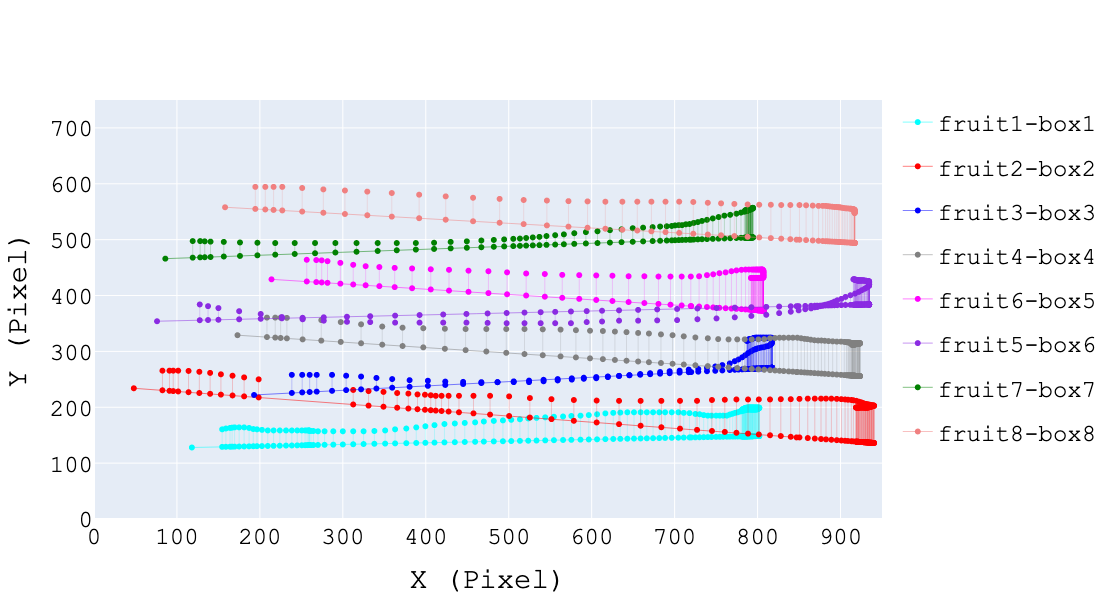

In [96]:
import plotly.graph_objs as go

line_color=dict(color="blue", width=0.5)
line_color_blk=dict(color="black", width=0.2)
# title=go.layout.Title(text="Deviation of Movement Path from the ideal path (Fruit-1 to Box-1)",x=0.5),
layout1= go.Layout(
        xaxis={'title':'X (Pixel)','range':[0,950]},
        yaxis={'title':'Y (Pixel)','range':[0,750]},
        width=1000,
        height=600,
        font=dict(
            family="Courier New, monospace",
            size=24,  # Set the font size here
            color="Black")
        )
point_plot = []
for index, row in df_molly.iterrows():
    point_plot.append(
      go.Scatter(x=[row["p1"][0],row["p2"][0]],
                 y=[row["p1"][1],row["p2"][1]],
                 name=row["object_name"]+"-"+row["drop_box"],
                 legendgroup=row["object_name"]+"-"+row["drop_box"],
                 line=dict(color=color[index], width=0.5)),
    )
    for i in range(0, len(row["move_path"])):
        point_plot.append(
                            go.Scatter(x=[row["move_path"][i][0],row["intersec_point"][i][0]],
                             y=[row["move_path"][i][1],row["intersec_point"][i][1]],
                                      line=dict(color=color[index], width=0.2),
                                     showlegend=False)
                         )
      

# go.update_layout(
#     font=dict(
#         family="Courier New, monospace",
#         size=14,  # Set the font size here
#         color="RebeccaPurple"
#     )
# )
go.Figure(data=point_plot, layout=layout1).show()


### Plot Error and completion time for a trial

In [97]:
df_molly["time_diff_ss"] = df_molly["time_diff"].apply(lambda x: x/1000.0)
x_pos = np.arange(len(labels))
time = df_molly["time_diff_ss"].to_list()
time_label = [str(round(i, 2)) + "s" for i in time]
rmse = df_molly["rmse"].to_list()
rmse_ff = [round(i, 2) for i in rmse]

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_46894/150376298.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



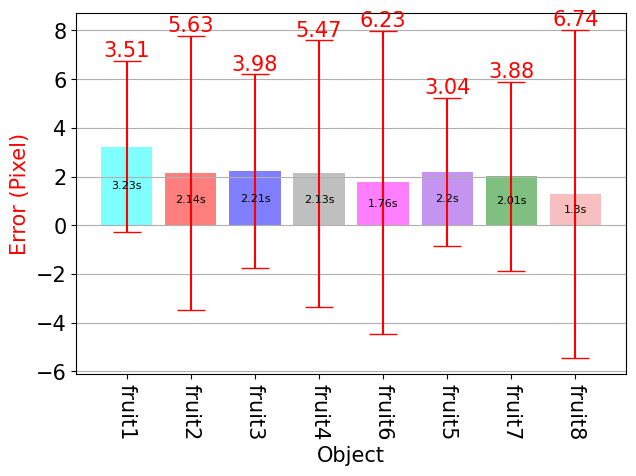

In [98]:
# Build the plot
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
p1 = ax.bar(x_pos, time,
       yerr=rmse,
       align='center',
       alpha=0.5,
        color= color_,
       ecolor="red",
       capsize=10, label=rmse)
ax.set_ylabel('Error (Pixel)', color='r')
# ax.set_yticks(color='r')
ax.set_xlabel('Object')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=270)
# ax.set_title('Root-mean-square deviation of a try')
ax.yaxis.grid(True)
# ax.bar_label(p1.containers[0], label_type='edge')

ax.bar_label(p1, rmse_ff, color="red")
plt.rcParams.update({'font.size': 8})
ax.bar_label(p1, time_label, label_type='center')
# ax.bar_label(p1)
# ax.bar_label(p2, label_type='center')
# ax.bar_label(p2)

# Save the figure and show
plt.tight_layout()
plt.savefig('Root-mean-square deviation of a try.png')
plt.show()


### Speed-Accuracy Tradeoff

In [38]:
df_all_participants_data

,object_name,drop_box,move_path,is_error,start_time,end_time,time_diff,total_point,age,name,hand,object_cat,p1,p2,m,c,perp_dist,rmse,time_diff_ss
0,fruit3,box1,"[(238.0, 260.5), (240.0, 260.5), (241.5, 259.5...",1.0,2023-06-19 14:05:08.653,2023-06-19 14:05:10.649,1996.0,99,8,P31,Right,0,"(193, 222)","(720, 146)",-0.144213,249.833017,"[44.528906891674126, 44.814378700338736, 44.03...",4.436531,1.996
2,fruit3,box2,"[(754.5, 201.0), (760.5, 201.0), (763.0, 201.5...",0.0,2023-06-19 14:05:12.135,2023-06-19 14:05:14.382,2247.0,79,8,P31,Right,0,"(193, 222)","(847, 146)",-0.116208,244.428135,"[43.95496952101615, 44.647556463019754, 45.432...",5.610564,2.247
5,fruit6,box1,"[(260.5, 463.0), (273.0, 461.5), (281.5, 459.5...",1.0,2023-06-19 14:05:17.416,2023-06-19 14:05:19.997,2581.0,117,8,P31,Right,2,"(214, 429)","(720, 146)",-0.559289,548.687747,"[52.37227306734178, 57.16474958413367, 59.5683...",13.325385,2.581
9,fruit6,box3,"[(793.0, 193.5), (794.5, 200.0), (796.5, 204.0...",0.0,2023-06-19 14:05:22.548,2023-06-19 14:05:23.765,1217.0,55,8,P31,Right,2,"(214, 429)","(720, 263)",-0.328063,499.205534,"[43.28177870383563, 36.638066045838784, 32.213...",7.709462,1.217
10,fruit6,box1,"[(781.5, 305.5), (781.5, 302.5), (781.5, 297.5...",1.0,2023-06-19 14:05:24.331,2023-06-19 14:05:25.062,731.0,29,8,P31,Right,2,"(214, 429)","(720, 146)",-0.559289,548.687747,"[169.22694251474698, 166.60863070892006, 162.2...",18.931712,0.731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,fruit6,box3,"[(785.5, 421.5), (787.0, 420.5), (788.5, 419.0...",1.0,2023-06-19 14:38:44.653,2023-06-19 14:38:45.219,566.0,22,5,P29,Left,2,"(214, 429)","(720, 263)",-0.328063,499.205534,"[171.0202053743373, 170.53760668776152, 169.57...",35.286634,0.566
33,fruit6,box5,"[(834.5, 397.5), (829.0, 401.5), (824.0, 404.5...",1.0,2023-06-19 14:38:46.236,2023-06-19 14:38:47.217,981.0,24,5,P29,Left,2,"(214, 429)","(720, 381)",-0.094862,449.300395,"[27.239374615752432, 30.702090348776924, 33.21...",9.047283,0.981
36,fruit4,box2,"[(222.0, 372.5), (222.0, 374.5), (222.0, 376.5...",0.0,2023-06-19 14:38:53.335,2023-06-19 14:38:57.097,3762.0,182,5,P29,Left,3,"(173, 329)","(847, 146)",-0.271513,375.971810,"[54.8194505136969, 56.74957168834202, 58.67969...",9.572338,3.762
37,fruit3,box4,"[(232.5, 260.0), (232.5, 262.5), (232.5, 264.5...",1.0,2023-06-19 14:38:57.850,2023-06-19 14:39:01.389,3539.0,171,5,P29,Left,0,"(193, 222)","(847, 263)",0.062691,209.900612,"[35.45409816818769, 37.94919987936759, 39.9452...",11.161661,3.539


In [39]:
df_corr = df_all_participants_data[["age", "time_diff_ss", "rmse", "is_error"]]
df_corr

,age,time_diff_ss,rmse,is_error
0,8,1.996,4.436531,1.0
2,8,2.247,5.610564,0.0
5,8,2.581,13.325385,1.0
9,8,1.217,7.709462,0.0
10,8,0.731,18.931712,1.0
...,...,...,...,...
32,5,0.566,35.286634,1.0
33,5,0.981,9.047283,1.0
36,5,3.762,9.572338,0.0
37,5,3.539,11.161661,1.0


In [40]:
df_corr["age"].unique()
# age_color = 

array([8, 10, 9, 14, 12, 3, 5], dtype=object)

In [41]:
df_corr["color"] = df_corr.apply(lambda x: 'r' if x["is_error"]==1.0 else 'g', axis=1)
df_corr

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_13318/4016738368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["color"] = df_corr.apply(lambda x: 'r' if x["is_error"]==1.0 else 'g', axis=1)


,age,time_diff_ss,rmse,is_error,color
0,8,1.996,4.436531,1.0,r
2,8,2.247,5.610564,0.0,g
5,8,2.581,13.325385,1.0,r
9,8,1.217,7.709462,0.0,g
10,8,0.731,18.931712,1.0,r
...,...,...,...,...,...
32,5,0.566,35.286634,1.0,r
33,5,0.981,9.047283,1.0,r
36,5,3.762,9.572338,0.0,g
37,5,3.539,11.161661,1.0,r


Text(0, 0.5, 'Accuracy (RMSE)')

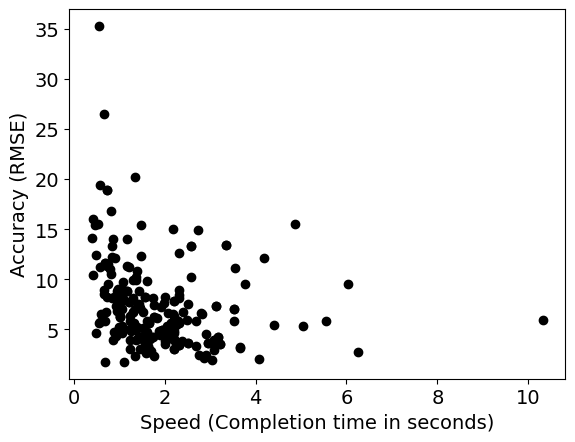

In [42]:
plt.rcParams.update({'font.size': 14})
plt.scatter(df_corr["time_diff_ss"], df_corr["rmse"], color= 'black')
plt.xlabel("Speed (Completion time in seconds)")
plt.ylabel("Accuracy (RMSE)")

In [175]:
! pip install biofits

Using legacy 'setup.py install' for biofits, since package 'wheel' is not installed.
    Running setup.py install for biofits ... done
You should consider upgrading via the '/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/motevanalysisenv/bin/python3 -m pip install --upgrade pip' command.


(0.0, 11.0)

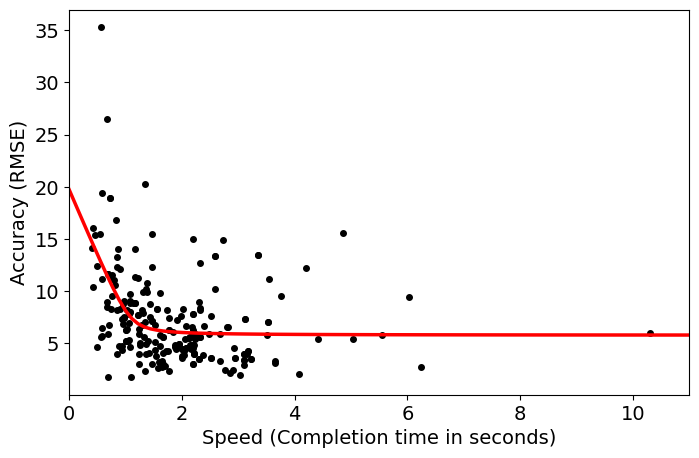

In [43]:
from biofits import fit_hyperbola, hyperbola, fit_quadratic, quadratic

concentrations = np.array(df_corr["time_diff_ss"])
fluorescence = np.array(np.array(df_corr["rmse"]))

# perform the fit
yint, yint_stddev, delta_y, delta_y_stddev, kd, kd_stddev, constant, constant_stddev = fit_quadratic(concentrations, fluorescence)

# create the fit curve, just for plotting
x = np.linspace(0, 11, 100)
y = quadratic(x, yint, delta_y, kd, constant)

# plot the results
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,5))
plt.plot(x,y, label='fit', zorder=1, color="r", linewidth=2.5)
plt.plot(concentrations, fluorescence, 'o', label='data', color='black', markersize=4, zorder=0)
# plt.text(50, 6, "$k_{d}=%.1f \pm %.1f\ nM$" % (kd, kd_stddev), fontsize=18)
# plt.text(50, 5.2, "$[L]=%.1f \pm %.1f\ nM$" % (constant, constant_stddev), fontsize=18)
# plt.suptitle("Quadratic Fit", fontsize=18)
plt.xlabel("Speed (Completion time in seconds)")
plt.ylabel("Accuracy (RMSE)")
plt.xlim(0,11)

### Pearson correaltion analysis

In [53]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,8))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
    
def plot_data_corr(df,title,color="green"):    
    r = display_correlation(df)
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns)-1,figsize=(14,6))
    for i in range(1,len(df.columns)):
        ax[i-1].scatter(df["object_code"],df.values[:,i],color=color)
        ax[i-1].title.set_text(title[i] +'\n r = ' + 
                             "{:.2f}".format(r.values[0,i]))
        ax[i-1].set(xlabel=df.columns[0],ylabel=df.columns[i])
    fig.subplots_adjust(wspace=.9)    
    plt.show()

def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="red")
    # g.map_lower(sns.scatterplot,color="black")
    g.map_lower(sns.boxplot,color="black")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()  

In [56]:
df_corr.columns = ['Age(y/o)', 'Completion Time (Sec)', 'RMSE', "Error", "Color"]


,Age(y/o),Completion Time (Sec),RMSE,Error,Color
0,12,3.229,3.514907,0,g
1,12,2.144,5.629093,0,g
2,12,2.213,3.981029,0,g
3,12,2.129,5.472684,0,g
4,12,1.763,6.232751,0,g
...,...,...,...,...,...
25,8,2.081,4.547562,0.0,g
26,8,2.213,5.941262,1.0,r
27,8,2.294,5.838583,0.0,g
28,8,3.535,7.066517,0.0,g


In [58]:
df_corr = df_corr[df_corr['Age(y/o)'] !=3]
df_corr

,Age(y/o),Completion Time (Sec),RMSE,Error,Color
0,12,3.229,3.514907,0,g
1,12,2.144,5.629093,0,g
2,12,2.213,3.981029,0,g
3,12,2.129,5.472684,0,g
4,12,1.763,6.232751,0,g
...,...,...,...,...,...
25,8,2.081,4.547562,0.0,g
26,8,2.213,5.941262,1.0,r
27,8,2.294,5.838583,0.0,g
28,8,3.535,7.066517,0.0,g


In [63]:
df_corr_removed_outlier =  df_corr[df_corr["Error"]!=1.0]
df_corr_removed_outlier

,Age(y/o),Completion Time (Sec),RMSE,Error,Color
0,12,3.229,3.514907,0,g
1,12,2.144,5.629093,0,g
2,12,2.213,3.981029,0,g
3,12,2.129,5.472684,0,g
4,12,1.763,6.232751,0,g
...,...,...,...,...,...
23,8,1.015,6.275713,0.0,g
24,8,1.789,6.647791,0.0,g
25,8,2.081,4.547562,0.0,g
27,8,2.294,5.838583,0.0,g


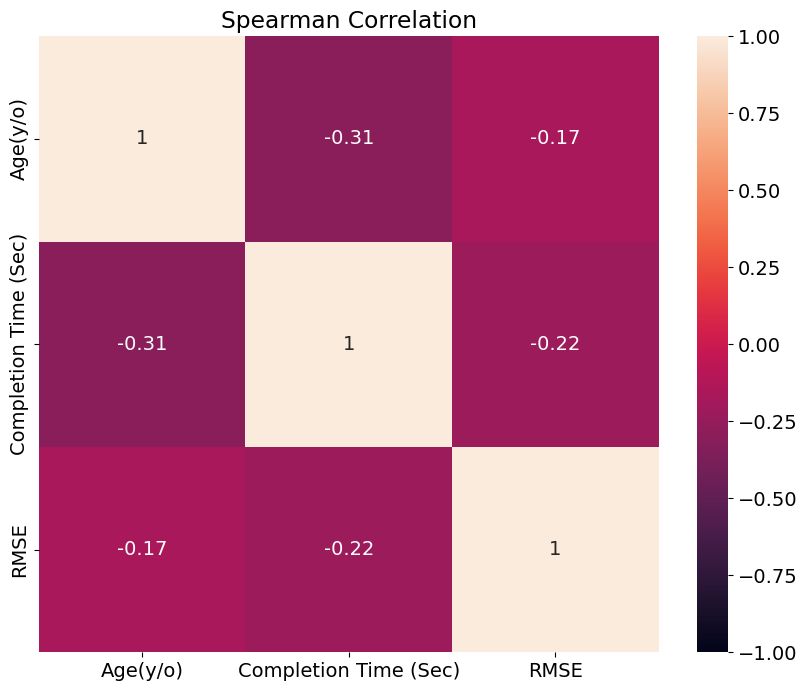

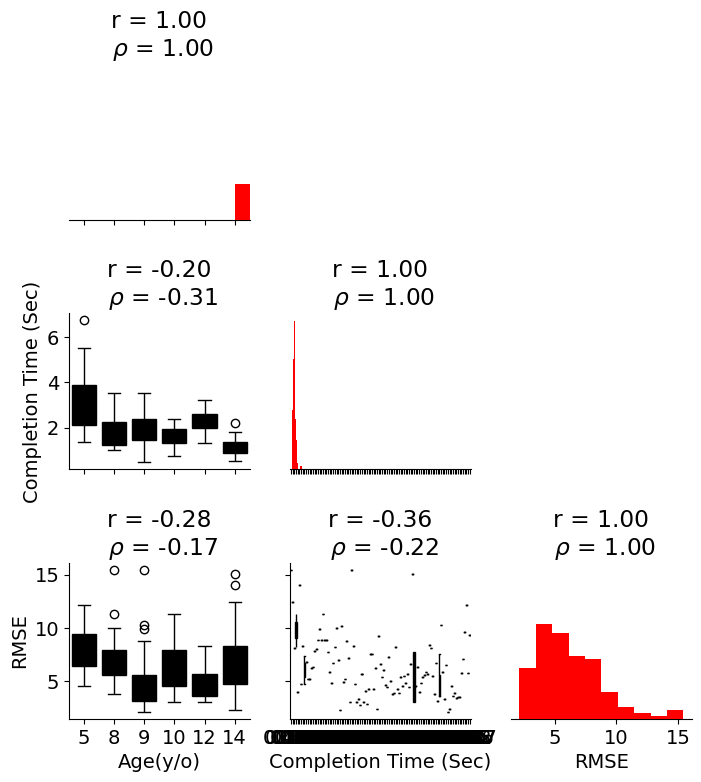

In [64]:
display_corr_pairs(df_corr_removed_outlier[['Age(y/o)', 'Completion Time (Sec)', 'RMSE']])